### O objetivo será entender a quantidade de empréstimos a partir das variáveis categóricas do seu conjunto de dados.

#### Vamos explorar algumas das variáveis categóricas das quais precisaremos extrair mais informações. Elas são:

- #### Tipo de vínculo
- #### Coleção
- #### Biblioteca
- #### Classificação geral da CDU

Ao se analisar uma nova variável, é bem interessante verificar cada uma listando quais são os valores únicos dentro delas.

Para explorar os dados, alguns questionamentos serão pertinentes para a diretoria das bibliotecas, como:

#### 1. “Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?”
Desta forma, a diretoria poderá entender qual é o público que está utilizando a biblioteca e assim tomar decisões em continuar com a estratégia de negócio atual ou modificá-la.

#### 2. Quais coleções são mais emprestadas?
#### 3. Da mesma forma, as coleções. Ranquear as coleções mais emprestadas pelo público, será bastante importante para a estratégia atual.

#### 4. Quais são as bibliotecas com mais ou menos quantidade de empréstimos?
Assim, a diretoria conseguirá entender onde ela deverá melhorar e focar suas iniciativas.

Você visualizará os dados dos empréstimos que aconteceram, mas e os dados que não estão aqui na análise?

#### 5. Por quais outras perspectivas você pode entender essa tabela de como ela se formou? Comparar bibliotecas de tamanhos diferentes, com públicos diferentes, acervos diferentes... isso faz sentido para a diretoria do sistema de bibliotecas? Aponte algumas outras métricas que poderiam entrar aqui para enriquecer essa análise.

#### 6. De quais temas da CDU são os exemplares emprestados?

Entender quais os temas mais procurados pelos usuários é fundamental para o desenvolvimento de novos planos de marketing do acervo. Para que possam não apenas fortalecer o que está sendo utilizado, mas também promover o que não está.

#### 7. Gere uma tabela de frequência e com o percentual para cada variável.

#### 8. Como é um trabalho repetitivo, crie uma função que gere a tabela com os valores.

#### 9. Após geradas as tabelas, traga algumas das suas percepções para as análises com o que você poderá contribuir para a diretoria da biblioteca.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/gondor/DevEnvironment/Python/AluraCursos/SevenDaysOfCode/ProjetoEmprestimoBiblioteca/Datasets/df_final.csv')
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU
0,709686,2006017618,2010/01/26 08:07:01.738000000,2010-01-04 08:08:44.081,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
1,749227,2006017618,2010/04/19 17:35:25.987000000,2010-04-05 11:25:57.627,2010/04/27 11:37:02.530000000,2.011105e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
2,1175444,2006017618,2012/03/11 17:05:30.982000000,2012-02-24 16:18:40.959,2012/03/28 14:32:13.000000000,2.010057e+09,ALUNO DE GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,1209694,2006017618,2012/04/11 12:34:59.458000000,2012-03-28 14:33:04.249,2012/04/25 11:48:28.000000000,2.010057e+09,ALUNO DE GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
4,1374962,2006017618,2012/12/12 07:40:40.406000000,2012-11-14 12:41:25.081,2013/01/15 17:10:17.000000000,2.011104e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas


#### 1. “Como se distribuem os empréstimos de exemplares pelos tipos de vínculo dos usuários?”

In [3]:
publico = df[['tipo_vinculo_usuario']].value_counts().to_frame('quantidade')
publico

,quantidade
tipo_vinculo_usuario,
ALUNO DE GRADUAÇÃO,684988
ALUNO DE PÓS-GRADUAÇÃO,122994
DOCENTE,24957
SERVIDOR TÉCNICO-ADMINISTRATIVO,12797
ALUNO MÉDIO/TÉCNICO,7467
DOCENTE EXTERNO,2547
USUÁRIO EXTERNO,6


In [4]:
publico.reset_index(inplace=True)

In [5]:
publico

,tipo_vinculo_usuario,quantidade
0,ALUNO DE GRADUAÇÃO,684988
1,ALUNO DE PÓS-GRADUAÇÃO,122994
2,DOCENTE,24957
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,12797
4,ALUNO MÉDIO/TÉCNICO,7467
5,DOCENTE EXTERNO,2547
6,USUÁRIO EXTERNO,6


#### PS: Devido a discrepância de valores, optou-se pela utilização da escala logarítmica para melhor visualização dos dados. Será repetido sempre que necessário.

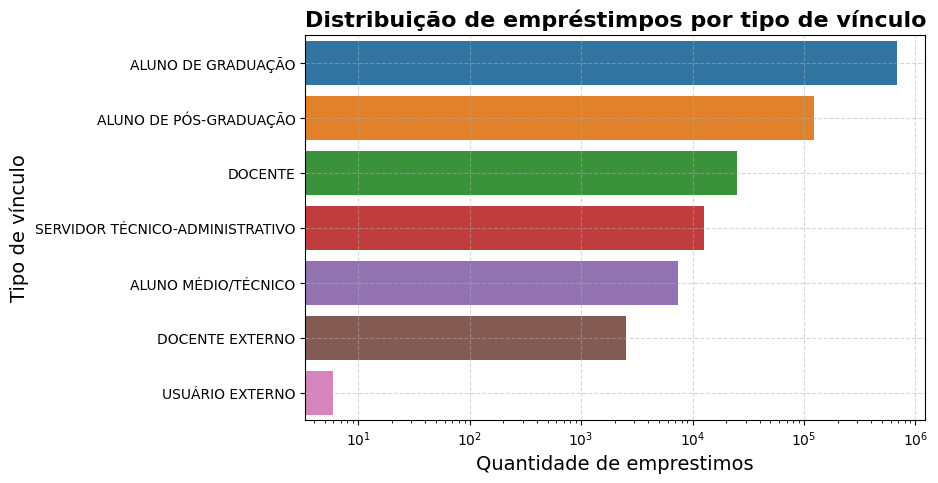

In [6]:
fig = plt.figure(figsize=(8, 5))
plt.xscale("log")
sns.barplot(data = publico, y = 'tipo_vinculo_usuario', x = 'quantidade')
plt.title('Distribuição de empréstimpos por tipo de vínculo', fontsize=16, fontweight='bold')
plt.ylabel('Tipo de vínculo', fontsize=14)
plt.xlabel('Quantidade de emprestimos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)


Resposta: O gráfico de barras acima deixa claro que o público que mais obtém empréstimo na biblioteca são alunos de graduação, seguindo por alunos de pós-graduação.

#### 2. Quais coleções são mais emprestadas?

In [7]:
colecoes = df[['colecao']].value_counts().to_frame('quantidade')

In [8]:
colecoes.reset_index(inplace=True)

In [9]:
colecoes

,colecao,quantidade
0,Acervo Circulante,854389
1,Monografias,549
2,Publicações de Autores do RN,316
3,Publicações da UFRN,218
4,Multimeios,71
5,Obras de Referência,58
6,Dissertações,46
7,Folhetos,35
8,Coleção Mossoroense,19
9,Eventos,16


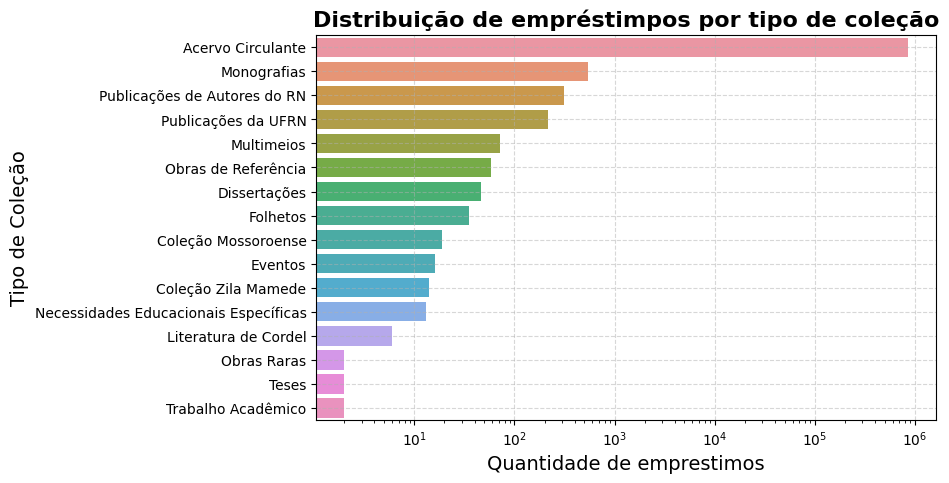

In [10]:
fig = plt.figure(figsize=(8, 5))
plt.xscale("log")
sns.barplot(data = colecoes, y = 'colecao', x = 'quantidade')
plt.title('Distribuição de empréstimpos por tipo de coleção', fontsize=16, fontweight='bold')
plt.ylabel('Tipo de Coleção', fontsize=14)
plt.xlabel('Quantidade de emprestimos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)


Resposta: Fica claro do gráfico acima que 'Acervo Circulante' é o tipo de coleção mais emprestado, com uma ordem de grandeza 3 potências de 10 maior que o segundo tipo mais emprestado, 'Monografias'.

#### 3. Da mesma forma, as coleções. Ranquear as coleções mais emprestadas pelo público, será bastante importante para a estratégia atual.

Resposta pode ser visualizada no gráfico de barrar acima.

#### 4. Quais são as bibliotecas com mais ou menos quantidade de empréstimos?

In [15]:
bibliotecas = df[['biblioteca']].value_counts().to_frame('quantidade')

In [14]:
total_bibli = df[['biblioteca']].value_counts().sum()

In [20]:
bibliotecas['percentual'] = bibliotecas['quantidade'].map(lambda x: round(x / total_bibli, 5)*100)

In [21]:
bibliotecas

,quantidade,percentual
biblioteca,,
Biblioteca Central Zila Mamede,644194,75.278
Biblioteca Setorial do Centro Ciências da Saúde - CCS,55974,6.541
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,24194,2.827
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,21562,2.520
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,20595,2.407
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,15839,1.851
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",13358,1.561
Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ,10702,1.251
Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET,8330,0.973


#### 5. Por quais outras perspectivas você pode entender essa tabela de como ela se formou? Comparar bibliotecas de tamanhos diferentes, com públicos diferentes, acervos diferentes... isso faz sentido para a diretoria do sistema de bibliotecas? Aponte algumas outras métricas que poderiam entrar aqui para enriquecer essa análise.

In [25]:
relacao_colecao_biblioteca = df.loc[:, ['colecao', 'biblioteca']]
relacao_colecao_biblioteca.head()

,colecao,biblioteca
0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...
1,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...
2,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...
3,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...
4,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...


In [33]:
relacao_df = relacao_colecao_biblioteca.value_counts().to_frame('quantidade')
relacao_df

quantidade
colecao             biblioteca                                                    
Acervo Circulante   Biblioteca Central Zila Mamede                          643583
                    Biblioteca Setorial do Centro Ciências da Saúde...       55965
                    Biblioteca Setorial Prof. Alberto Moreira Campo...       24191
                    Biblioteca Setorial Profª. Maria Lúcia da Costa...       21553
                    Biblioteca Setorial da Faculdade de Ciências da...       20572
...                                                                            ...
Multimeios          Biblioteca Setorial da Faculdade de Ciências da...           1
Obras de Referência Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN...           1
                    Biblioteca Setorial do Centro Ciências da Saúde...           1
Trabalho Acadêmico  Biblioteca Setorial Prof. Horácio Nicolas Solim...           1
                    Biblioteca Setorial do Centro de Ciências Human...           1

[74 rows x 1 columns]

In [34]:
relacao_df.reset_index(level = 'biblioteca', inplace=True)

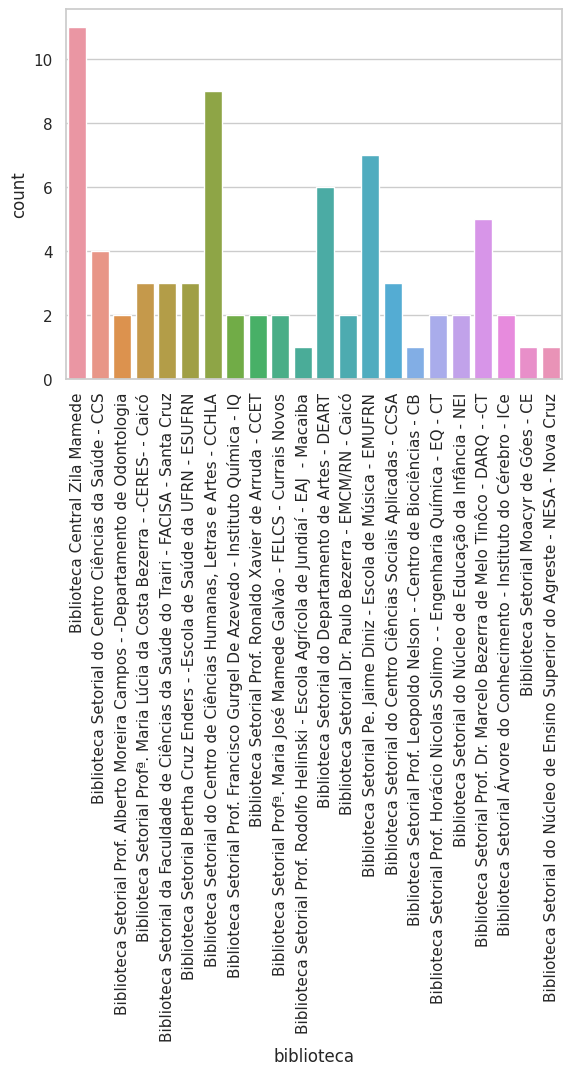

In [40]:
sns.set(style="whitegrid")
ax = sns.countplot(x="biblioteca", data=relacao_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

#### 6. De quais temas da CDU são os exemplares emprestados?

In [53]:
CDU = df[['CDU']].value_counts().to_frame('quantidade')

In [55]:
CDU.reset_index(inplace = True)

In [56]:
CDU

,CDU,quantidade
0,Ciências aplicadas,610640
1,Ciências sociais,145562
2,Matemática e ciências naturais,23960
3,Generalidades. Ciência e conhecimento,22719
4,Religião,22554
5,Filosofia e Psicologia.,21752
6,Geografia. Biografia. História,2957
7,Belas artes,2819
8,Linguagem. Língua. Linguística,2793


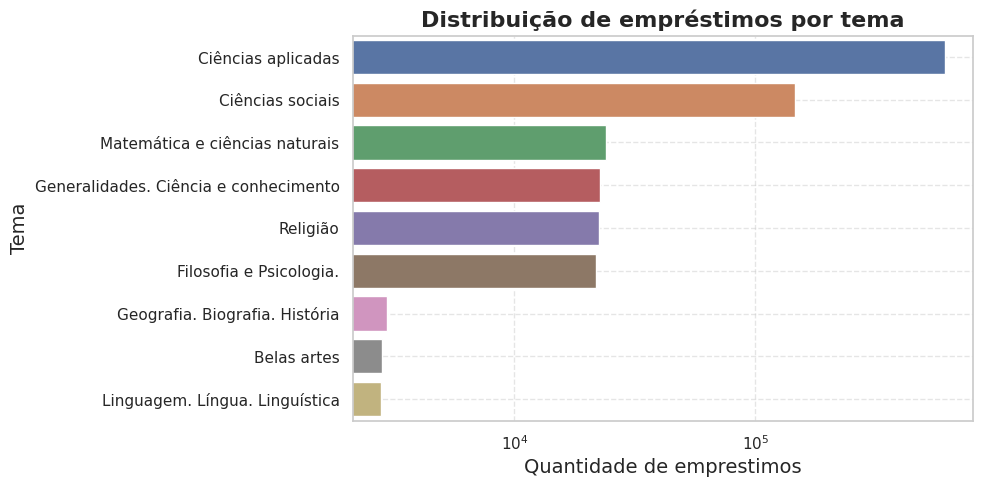

In [58]:
fig = plt.figure(figsize=(8, 5))
plt.xscale("log")
sns.barplot(data = CDU, y = 'CDU', x = 'quantidade')
plt.title('Distribuição de empréstimos por tema', fontsize=16, fontweight='bold')
plt.ylabel('Tema', fontsize=14)
plt.xlabel('Quantidade de emprestimos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)


#### 7. Gere uma tabela de frequência e com o percentual para cada variável.

In [62]:
soma = CDU.quantidade.sum()

In [63]:
CDU['percentual'] = CDU['quantidade'].map(lambda x: round(x/soma, 5)*100)

In [64]:
CDU

,CDU,quantidade,percentual
0,Ciências aplicadas,610640,71.357
1,Ciências sociais,145562,17.010
2,Matemática e ciências naturais,23960,2.800
3,Generalidades. Ciência e conhecimento,22719,2.655
4,Religião,22554,2.636
5,Filosofia e Psicologia.,21752,2.542
6,Geografia. Biografia. História,2957,0.346
7,Belas artes,2819,0.329
8,Linguagem. Língua. Linguística,2793,0.326


#### 9. Após geradas as tabelas, traga algumas das suas percepções para as análises com o que você poderá contribuir para a diretoria da biblioteca.

#### Tabela 1: tipo de vínculo

In [66]:
publico['percentual'] = publico['quantidade'].map(lambda x: round(x/publico.quantidade.sum(), 5)*100)

In [67]:
publico

,tipo_vinculo_usuario,quantidade,percentual
0,ALUNO DE GRADUAÇÃO,684988,80.045
1,ALUNO DE PÓS-GRADUAÇÃO,122994,14.373
2,DOCENTE,24957,2.916
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,12797,1.495
4,ALUNO MÉDIO/TÉCNICO,7467,0.873
5,DOCENTE EXTERNO,2547,0.298
6,USUÁRIO EXTERNO,6,0.001


#### Tabela 2: Coleções

In [69]:
colecoes['percentual'] = colecoes['quantidade'].map(lambda x: round(x/colecoes.quantidade.sum(), 5)*100)

In [70]:
colecoes

,colecao,quantidade,percentual
0,Acervo Circulante,854389,99.840
1,Monografias,549,0.064
2,Publicações de Autores do RN,316,0.037
3,Publicações da UFRN,218,0.025
4,Multimeios,71,0.008
5,Obras de Referência,58,0.007
6,Dissertações,46,0.005
7,Folhetos,35,0.004
8,Coleção Mossoroense,19,0.002
9,Eventos,16,0.002


#### Tabela 3: bibliotecas

In [71]:
bibliotecas

,quantidade,percentual
biblioteca,,
Biblioteca Central Zila Mamede,644194,75.278
Biblioteca Setorial do Centro Ciências da Saúde - CCS,55974,6.541
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,24194,2.827
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,21562,2.520
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,20595,2.407
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,15839,1.851
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",13358,1.561
Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ,10702,1.251
Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET,8330,0.973


#### Tabela 4: Temas

In [72]:
CDU

,CDU,quantidade,percentual
0,Ciências aplicadas,610640,71.357
1,Ciências sociais,145562,17.010
2,Matemática e ciências naturais,23960,2.800
3,Generalidades. Ciência e conhecimento,22719,2.655
4,Religião,22554,2.636
5,Filosofia e Psicologia.,21752,2.542
6,Geografia. Biografia. História,2957,0.346
7,Belas artes,2819,0.329
8,Linguagem. Língua. Linguística,2793,0.326


Resposta:
- Da tabela 1, considerando até 1% de significância a porcentagem para análise, a diretoria da biblioteca deve investir os emprestimos nos seguintes publicos: alunos de graduacao, alunos de pos-graduacao, docentes e servidor tecnico-administrativo.
-  Da tabela 2, considerando até 1% de significância a porcentagem para análise, a diretoria deve investir somente na coleção de Acervo Circulante.
- Da tabela 3, considerando até 1% de significância a porcentagem para análise, a diretoria deve investir nas seguintes bibliotecas: Biblioteca Central Zila Mamede, Biblioteca Setorial do Centro Ciências da Saúde - CCS, Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia, Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó, Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz, Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN, Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA, Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ.
- Da tabela 4, considerando até 1% de significância a porcentagem para análise, a diretoria deve investir nos seguintes temas: Ciências aplicadas, Ciências sociais, Matemática e ciências naturais, Generalidades. Ciência e conhecimento, Religião, Filosofia e Psicologia.